In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HealthMonitorDataset.xlsx to HealthMonitorDataset.xlsx


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Read Excel File
df = pd.read_excel("HealthMonitorDataset.xlsx")

# Step 2: Manually drop duplicated one-hot columns (those with .1 suffixes)
columns_to_drop = ['Dehydration.1', 'Medicine Overdose.1', 'Acidious.1', 'Cold .1', 'Cough.1']
df.drop(columns=columns_to_drop, inplace=True)

# Step 3: Drop NaN rows (optional depending on your data)
df.dropna(inplace=True)

# Step 4: Encode Target Column
label_encoder = LabelEncoder()
df["Causes Respiratory Imbalance"] = label_encoder.fit_transform(df["Causes Respiratory Imbalance"])

# Step 5: Normalize Vital Signs
vital_signs = ["Temperature", "Heart Rate", "Pulse", "BPSYS", "BPDIA", "Respiratory Rate", "Oxygen Saturation", "PH"]
scaler = StandardScaler()
df[vital_signs] = scaler.fit_transform(df[vital_signs])

# Step 6: Split Data into Features and Target
X = df.drop("Causes Respiratory Imbalance", axis=1)
y = df["Causes Respiratory Imbalance"]

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final check
print("✅ Preprocessing Done!")
print("Features:", X_train.shape)
print("Target class distribution:\n", y_train.value_counts())
print("Target classes:", label_encoder.classes_)


✅ Preprocessing Done!
Features: (3428, 14)
Target class distribution:
 Causes Respiratory Imbalance
0    1691
3    1076
1     537
2     124
Name: count, dtype: int64
Target classes: ['Chronic' 'Mild' 'Normal' 'Severe']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy Score: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

     Chronic       1.00      1.00      1.00       394
        Mild       1.00      1.00      1.00       152
      Normal       1.00      1.00      1.00        26
      Severe       1.00      1.00      1.00       286

    accuracy                           1.00       858
   macro avg       1.00      1.00      1.00       858
weighted avg       1.00      1.00      1.00       858


🧾 Confusion Matrix:
 [[394   0   0   0]
 [  0 152   0   0]
 [  0   0  26   0]
 [  0   0   0 286]]


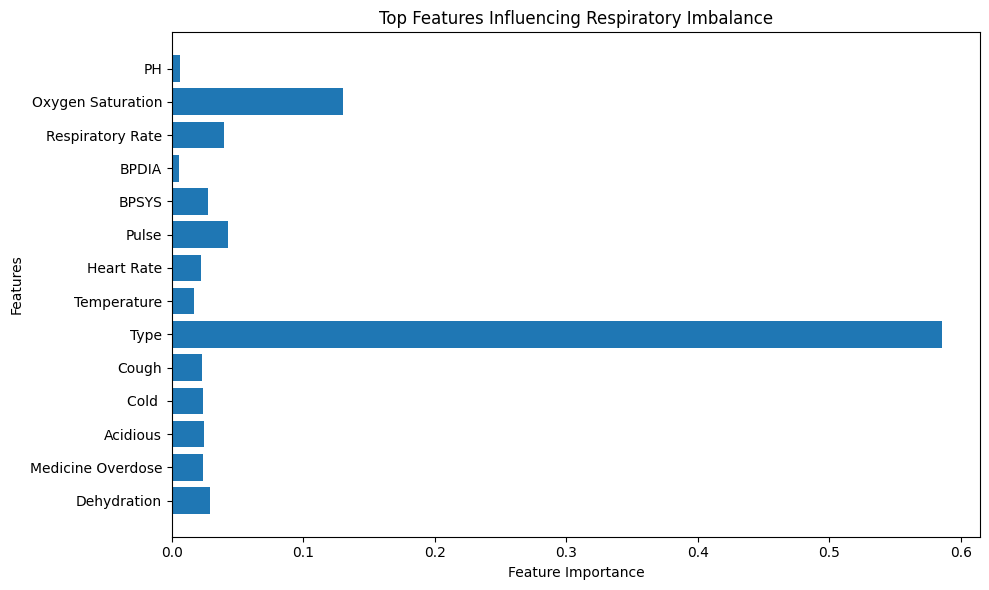

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top Features Influencing Respiratory Imbalance")
plt.tight_layout()
plt.show()


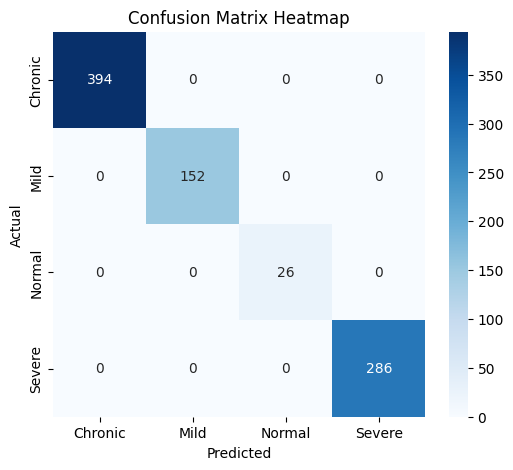

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


<ipython-input-9-59fa2434db85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="Set2")  # no need to set hue here


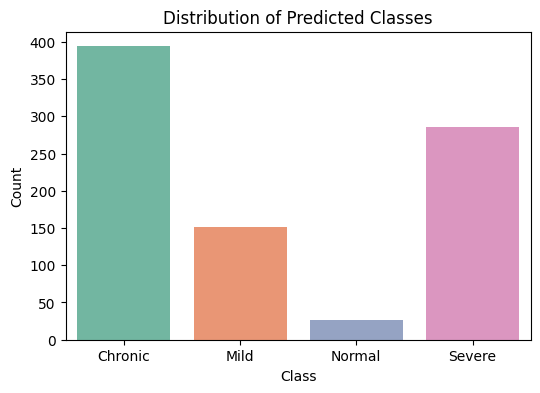

In [ ]:
# ✅ Corrected Version of Prediction Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette="Set2")  # no need to set hue here
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)  # auto-match
plt.title("Distribution of Predicted Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [12]:
from google.colab import files
uploaded = files.upload()


Saving HealthMonitorDataset.xlsx to HealthMonitorDataset.xlsx


In [13]:
df = pd.read_excel("HealthMonitorDataset.xlsx")


In [14]:
import os
print(os.listdir())


['.config', 'HealthMonitorDataset.xlsx', 'sample_data']


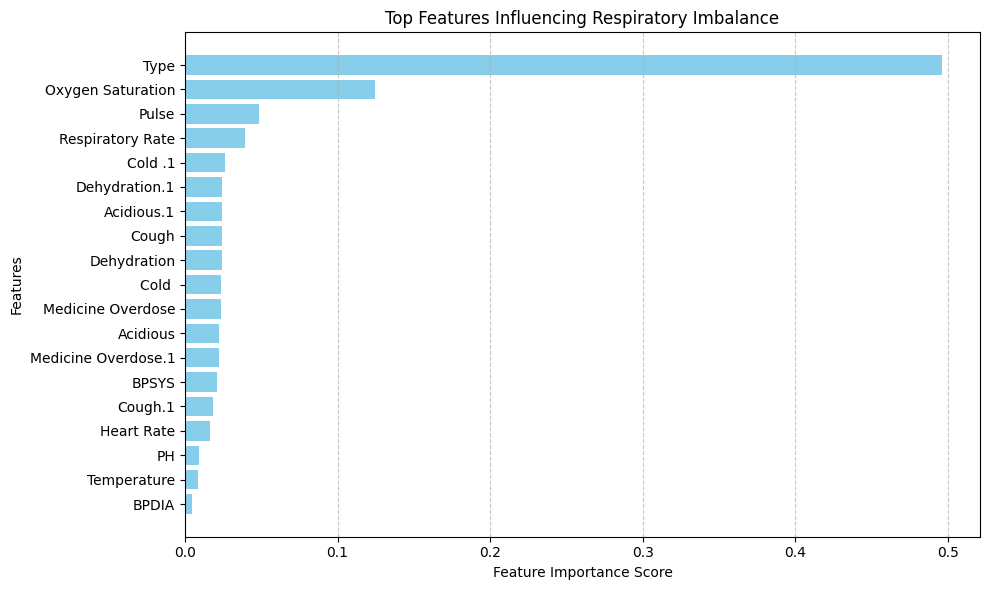

In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 2: Load dataset (assuming HealthMonitorDataset.xlsx is uploaded)
df = pd.read_excel("HealthMonitorDataset.xlsx")

# Step 3: Drop redundant columns (if any, adapt based on your dataset)
df = df.loc[:, ~df.columns.duplicated()]

# Step 4: Define features and target
X = df.drop("Causes Respiratory Imbalance", axis=1)
y = df["Causes Respiratory Imbalance"]

# Step 5: Encode target if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Feature Importance Plot
feature_importance = rf_model.feature_importances_
features = X.columns

# Sort and plot
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features Influencing Respiratory Imbalance")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


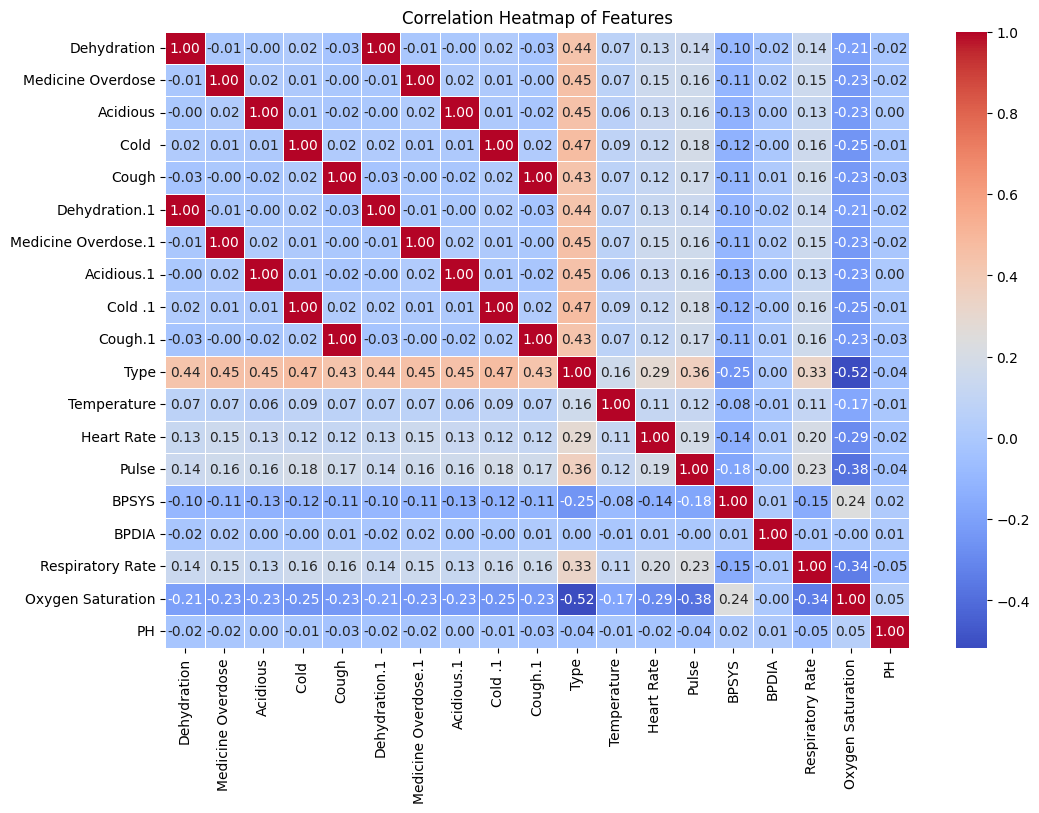

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


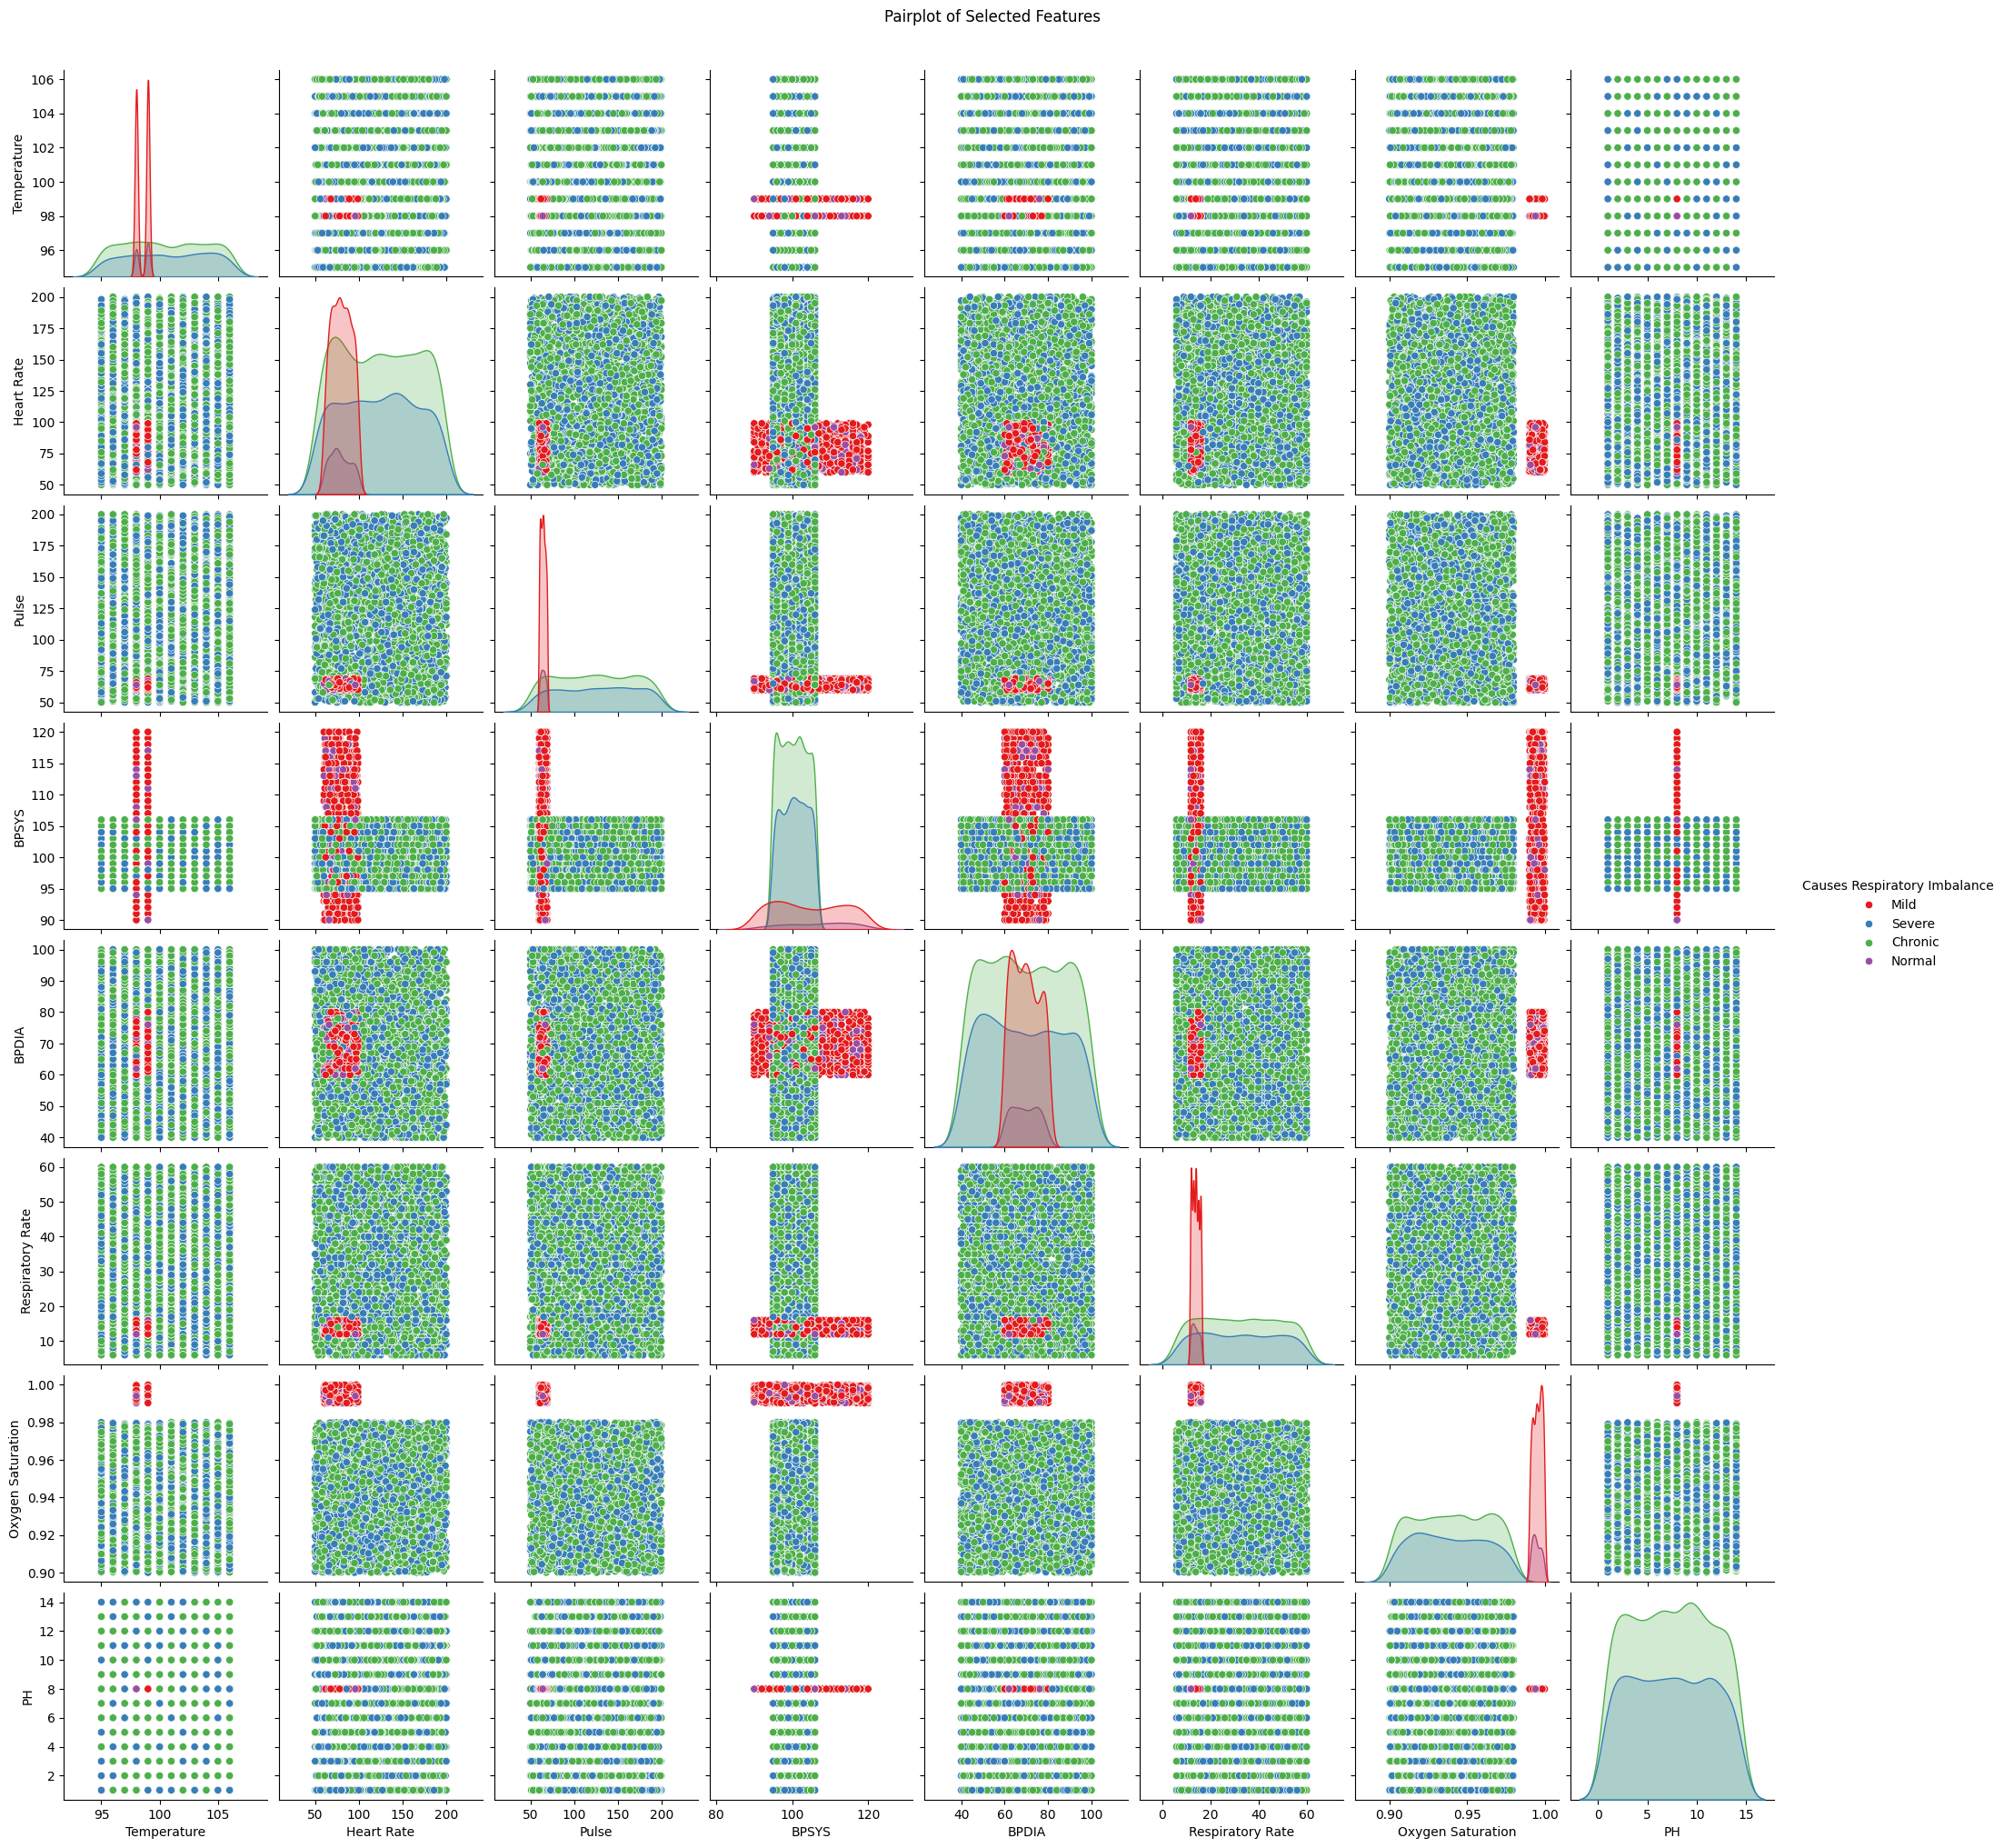

In [17]:
# Select top features manually or via feature importance
selected_features = ['Temperature', 'Heart Rate', 'Pulse', 'BPSYS', 'BPDIA', 'Respiratory Rate', 'Oxygen Saturation', 'PH', 'Causes Respiratory Imbalance']

# Convert target to categorical for better plot
df["Causes Respiratory Imbalance"] = df["Causes Respiratory Imbalance"].astype(str)

# Pairplot
sns.pairplot(df[selected_features], hue="Causes Respiratory Imbalance", palette="Set1")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()
